## Содержание:
* [Знакомство с Pandas](#pandas)
* [Графическое представление и описание поведения временного ряда](#first_first-bullet)
   * [Выделение закономерных (неслучайных) составляющих временного ряда](#second-bullet)
   * [Стационарность](#stacionary)
   * [Тренд](#trend)
   * [Выбросы](#out)
   * [Сезонность](#season)
* [Сглаживание и фильтрация](#filtre)
* [Автокорреляция и коррелограмма](#autocor)

### Знакомство с Pandas <a class="anchor" id="pandas"></a>

Встречайте библиотеку, которая позволяет комфортно обрабатывать и анализировать данные - Pandas!

In [54]:
!pip install pandas
!pip install statsmodels


[notice] A new release of pip available: 22.3.1 -> 23.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.3
[notice] To update, run: pip install --upgrade pip


In [55]:
# Импортируем необходимые библиотеки

import os
from os import path
from matplotlib import pyplot as plt
import pandas as pd

Мы будем работать с двумя рядами - нефильтрованной записью ЭКГ и записями о пассажиропотоке.

Импортируем необходимые данные

In [56]:
# с помощью системной библиотеки OS определяем путь до файла с данными ЭКГ

# загружаем данные в переменную, содержащую объект библиотеки Pandas - Dataframe
tsdf_c = pd.read_csv('data/Annual precipitation in inches entire great Lakes 19001986.csv')
# устанавливаем индекс времени для временного ряда и сортируем по нему выборку
tsdf_c.set_index('Time').sort_index()

,x
Time,
1,31.69
2,29.77
3,31.70
4,33.06
5,31.31
...,...
83,34.39
84,33.97
85,32.15


In [57]:
# с помощью метода head можно посмотреть первые несколько строк набора данных в
# качестве аргумента в head можно указать целое число - количество выводимых
# строк
tsdf_c.head()

,Time,x
0,1,31.69
1,2,29.77
2,3,31.70
3,4,33.06
4,5,31.31


In [58]:
# функция describe приводит описательную статистику о выборке: среднее, мат
# ожидание, моду и т.д. (если данные выборки позволяют эту статистику
# подсчитать)
tsdf_c.describe()

,Time,x
count,87.000000,87.000000
mean,44.000000,31.976092
std,25.258662,2.720494
min,1.000000,25.690000
25%,22.500000,30.325000
50%,44.000000,31.690000
75%,65.500000,33.590000
max,87.000000,40.160000


### Графическое представление и описание поведения временного ряда <a class="anchor" id="first_first-bullet"></a>


In [59]:
# с помощью функционала matplotlib описываем особый вывод ЭКГ
def plot_assignation(axp, data, xlabel, ylabel, title1):
    axp.plot(data)
    axp.set_xlabel(xlabel)
    axp.set_ylabel(ylabel)
    axp.set_title(title1 )

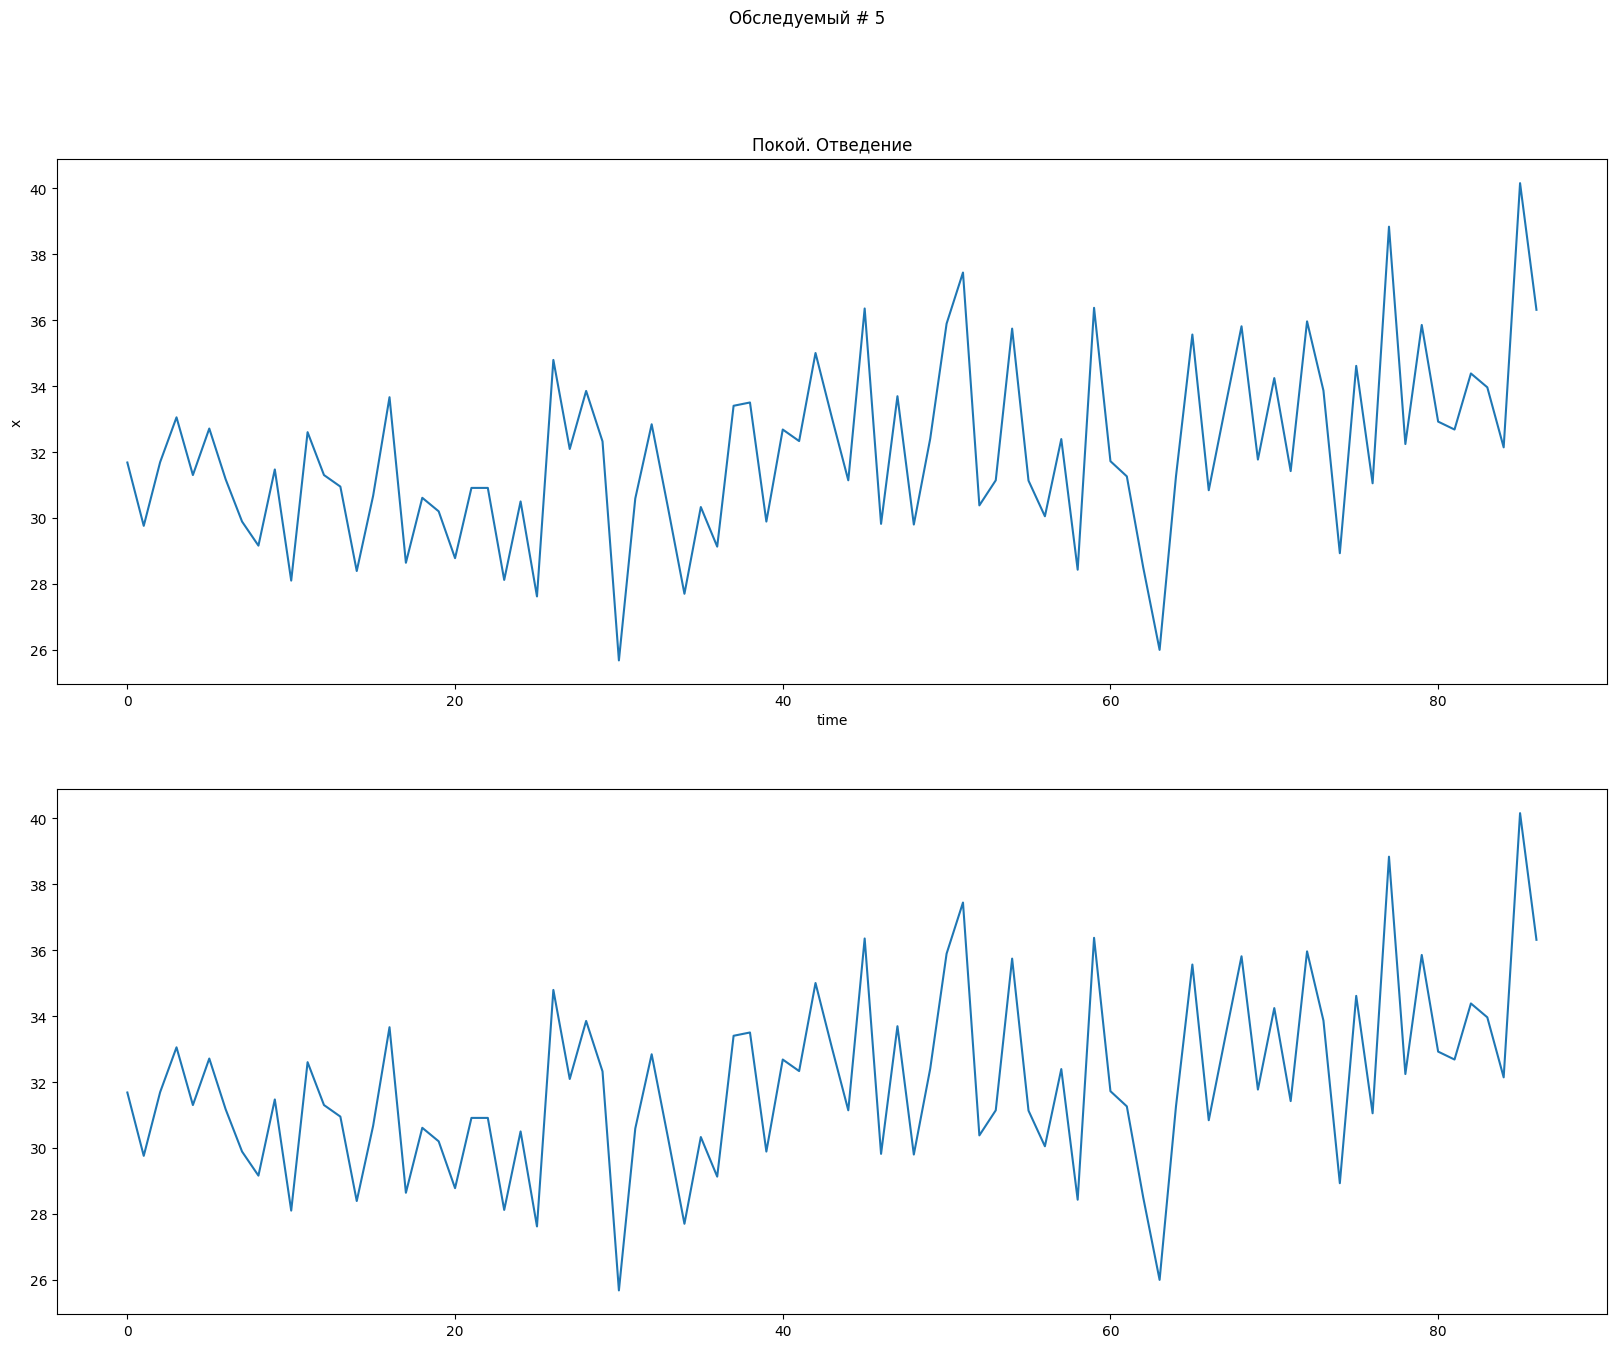

In [60]:
fig, axs = plt.subplots(2,1,figsize=(20, 15))
fig.suptitle('Обследуемый # 5')

plot_assignation(axs[0], tsdf_c["1"], 'time', 'x','Покой. Отведение')

axs[1].plot(tsdf_c["x"])

### Выделение закономерных (неслучайных) составляющих временного ряда <a class="anchor" id="second-bullet"></a>

#### Разложения ряда на компоненты

Тренды, Сезонность, Остаточность


https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html


1) ***Тренд*** — общая долгосрочная тенденция изменения временного ряда, лежащая в основе его динамики.

2) ***Сезонная вариация*** — краткосрочное регулярно повторяющееся колебание значений временного ряда вокруг тренда.

3) ***Циклические колебания*** характеризуют так называемый цикл деловой активности, или экономический цикл, состоящий из экономического подъема, спада, депрессии и оживления. Этот цикл повторяется регулярно.

4) ***Остаточная вариация***, которая может быть двух видов:
**аномальная вариация** — неестественно большое отклонение временного ряда, которое оказывает воздействие на единичное наблюдение;
**случайная вариация** — малое отклонение, которое невозможно предвидеть. В долгосрочной перспективе случайные вариации могут с равной вероятностью как снизить, так и увеличить объем продаж.

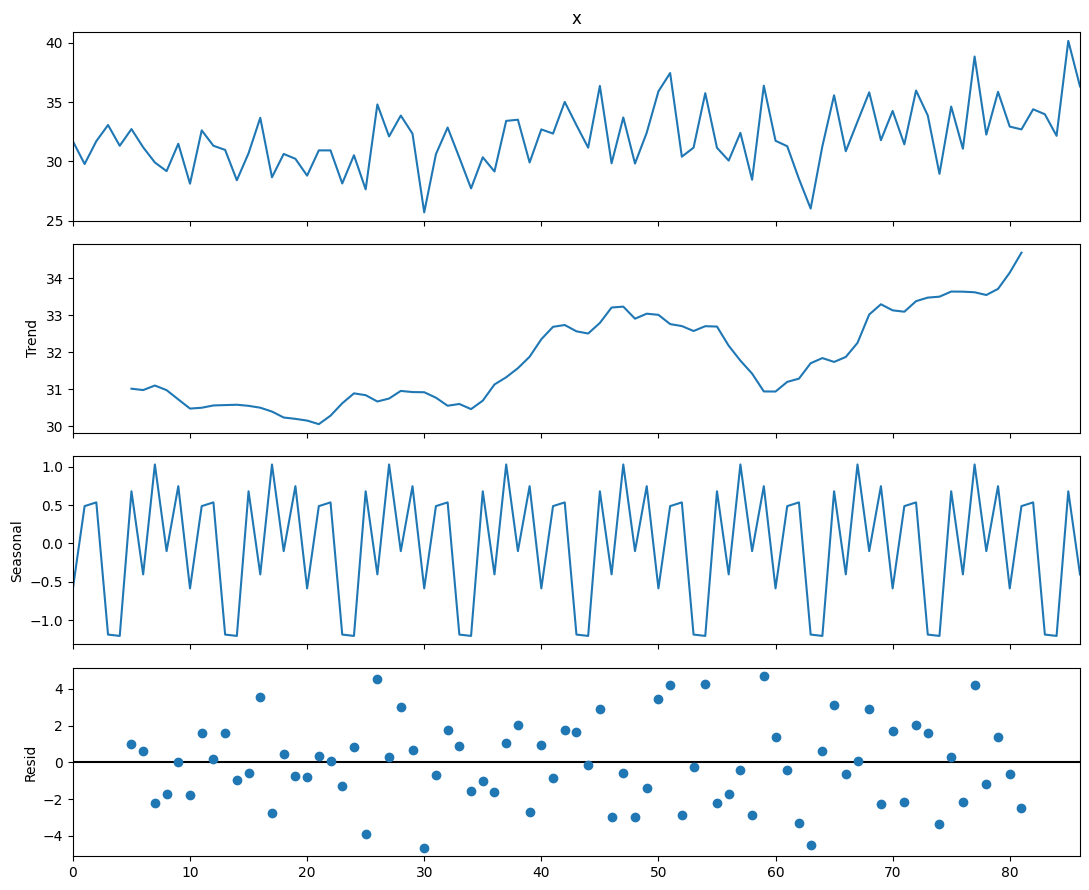

In [61]:
# импортируем функцию seasonal_decompose из statsmodels
# (то есть осуществляем декомпозицию сигнала/временного ряда)
from statsmodels.tsa.seasonal import seasonal_decompose

# задаем размер графика
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9


# применяем функцию к данным о перевозках
decompose = seasonal_decompose(passengers["Passengers"], period=10)
decompose.plot()
plt.show()

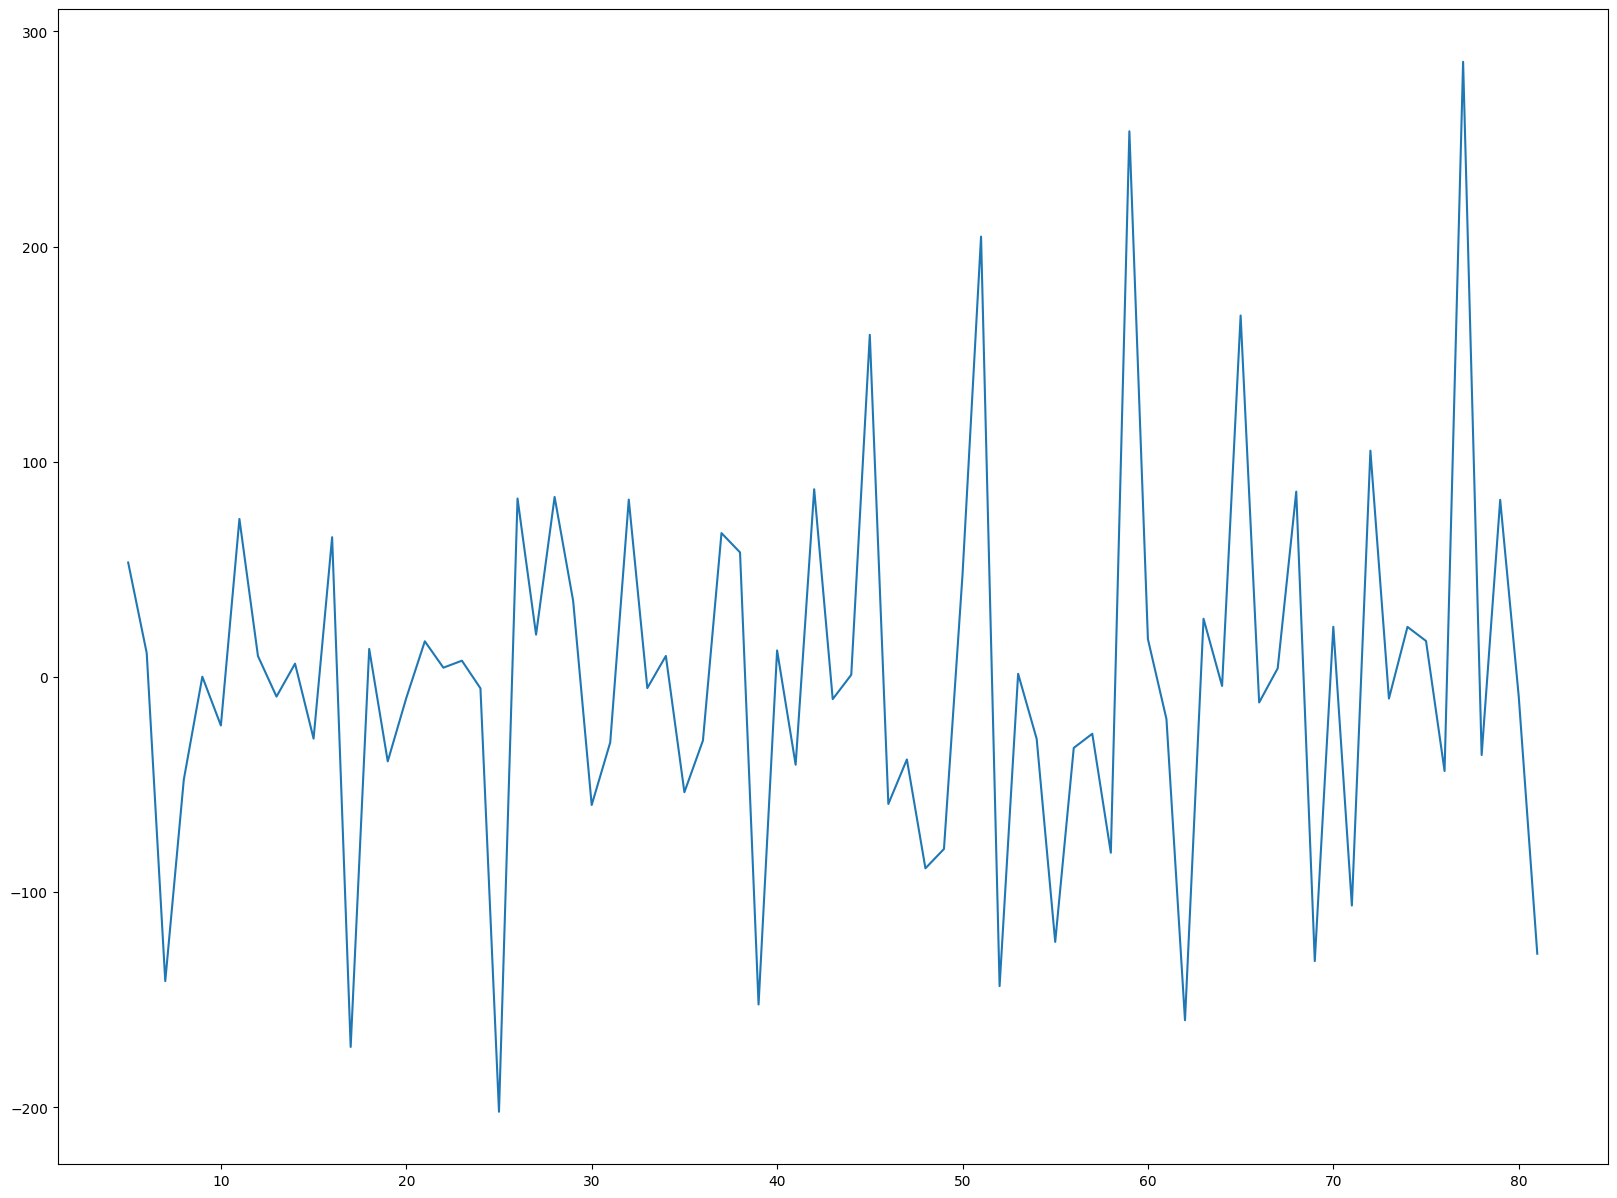

In [62]:
new_ps = decompose.trend*(decompose.seasonal+1)*decompose.resid

fig, axs = plt.subplots(figsize=(20, 15))
 
plt.plot(new_ps)
plt.show()

<Axes: >

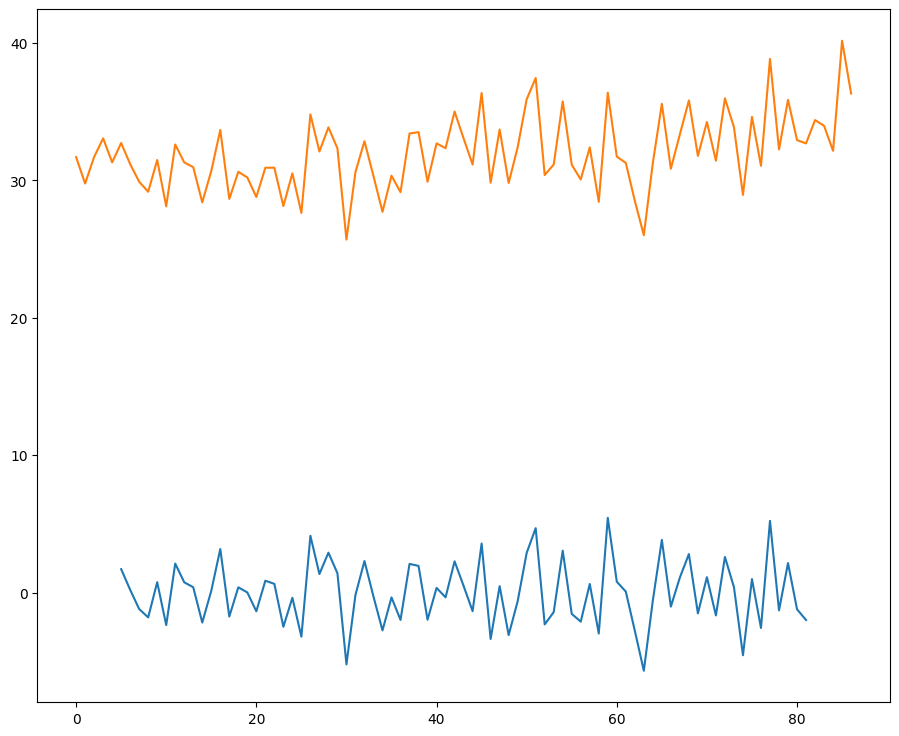

In [63]:
# удаляем компонент тренда из временного ряда...
passengers_r = passengers["Passengers"] - decompose.trend
# ...и отрисовываем обработанный и исходный ряды
passengers_r.plot()
passengers["Passengers"].plot()

In [64]:
# Ваш код здесь
# разложение ЭКГ по составляющим


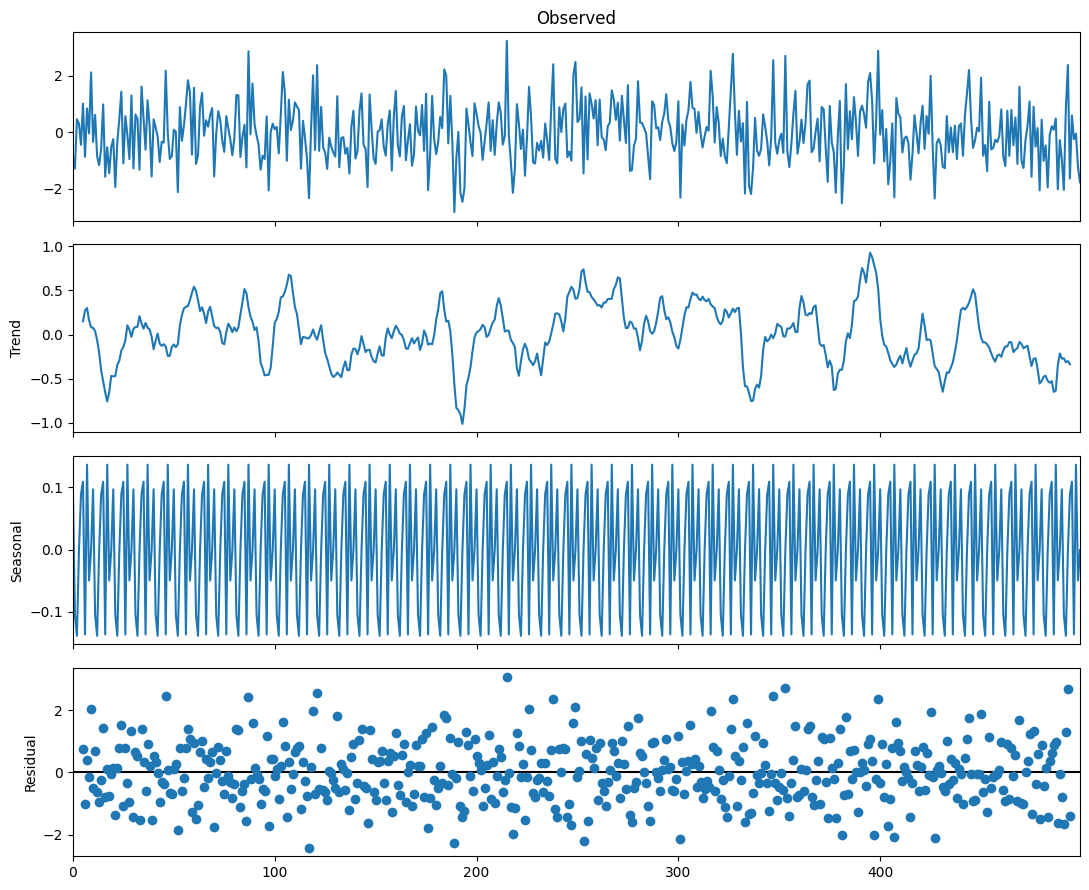

In [65]:
# разложение на составляюшие белый шум

import numpy as np
white_noise = np.random.normal(0,1, 500)

decompose = seasonal_decompose(white_noise, period=10, model="additive")
decompose.plot()
plt.show()

## Стационарный процесс  <a class="anchor" id="stacionary"></a>


Стационарный процесс - это случайный процесс, безусловное совместное распределение вероятностей которого не изменяется при сдвиге во времени. Следовательно, такие параметры, как среднее значение и дисперсия, также не меняются со временем, поэтому стационарные временные ряды легче прогнозировать.

Есть несколько способов установить, является ли временной ряд стационарным или нет, наиболее распространенными являются старая добрая визуализация, просмотр автокорреляции и выполнение статистических тестов.

Наиболее распространенным тестом является тест Дики-Фуллера (также называемый тест ADF), где нулевая гипотеза состоит в том, что временной ряд имеет единичный корень, другими словами, временной ряд не является стационарным.

Мы проверим, можно ли отвергнуть нулевую гипотезу, сравнив значение p с выбранным порогом (α), чтобы, если значение p меньше, мы могли отклонить нулевую гипотезу и предположить, что временной ряд с уверенностью является стационарным. уровень 1-α (технически мы просто не можем сказать, что это не так)

Временной ряд имеет единичный корень, или порядок интеграции один, если его первые разности образуют стационарный ряд. Это условие записывается как
$y_t\thicksim I(1)$ если ряд первых разностей $\triangle y_t=y_t-y_{t-1}$ является стационарным $\triangle y_t\thicksim I(0)$.

При помощи этого теста проверяют значение коэффициента $a$ в  авторегрессионном уравнении первого порядка AR(1)
$y_t=a\cdot y_{t-1}+\varepsilon_t,$
где $y_t$ — временной ряд, а $\varepsilon$— ошибка.

Если $a=1$, то процесс имеет единичный корень, в этом случае ряд $y_t$ не стационарен, является интегрированным временным рядом первого порядка $I(1)$. Если $|a|<1$, то ряд стационарный $I(0)$.


In [66]:
# импортируем функцию, описывающую тест Дики-Фуллера
from statsmodels.tsa.stattools import adfuller

In [67]:
# всю теорию, описанную выше, реализуем с помощью statsmodels для проверки
# временного ряда перевозок на стационарность

alpha = 0.05
name = "Пассажиры"
ts = passengers["Passengers"]

print(f'Тест Дики-Фуллера ряда {name} :')
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput["p-value"] < alpha:
    print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
else:
    print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")

Тест Дики-Фуллера ряда озера :
Test Statistic                 -1.714734
p-value                         0.423538
#Lags Used                      4.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64
Значение p больше 5.0%. Ряд не стационарный.


In [68]:
# проверьте на стационарность временной ряд с ЭКГ

### Тренд <a class="anchor" id="trend"></a>

Тренд - это компонент временного ряда, который представляет низкочастотные колебания во временном ряду, при этом высокочастотные и среднечастотные колебания отфильтрованы.

Как известно из лекции, существует три основных типа трендов.
1. Первым и самим очевидным типом тренда представляется тренд среднего, когда временной
ряд выглядит как колебания около медленно возрастающей или убывающей величины.

1. Второй тип трендов – это тренд дисперсии. В этом случае во времени меняется амплитуда
колебаний переменной.

1. Третий и более тонкий тип тренда, визуально не всегда наблюдаемый, – изменение
величины корреляции между текущим и предшествующим значениями ряда, т. е. тренд
автоковариации и автокорреляции.

Давайте напишем функцию, которая поможет нам понять тенденцию и движения временного ряда. Мы хотим видеть на графике некоторую скользящую статистику, такую как:

M скользящее среднее: невзвешенное среднее предыдущих n данных (также называемое скользящим средним).

Полосы Боллинджера: верхняя полоса в k раз на n-периодное стандартное отклонение выше скользящей средней и нижняя полоса в k раз на стандартное отклонение N ниже.

/var/folders/qc/xddyngm56mdcypsnpqnvckxm0000gn/T/ipykernel_2827/2443168864.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(rolling_mean, 'g', label='MA'+str(window),


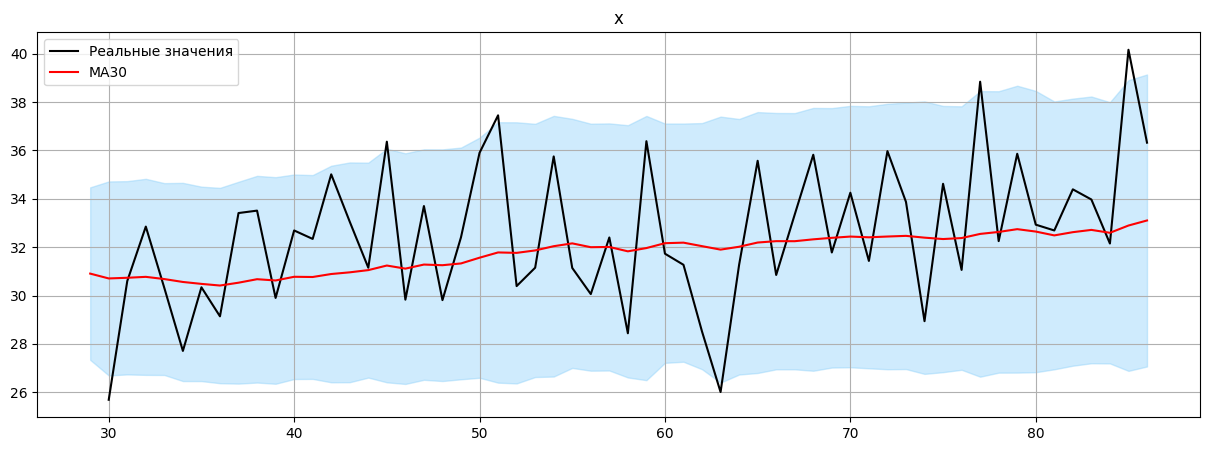

In [69]:
# указываем размер окна
window = 30

# вычисляем скользящее среднее и стандартное отклонение
rolling_mean = ts.rolling(window=window).mean()
rolling_std = ts.rolling(window=window).std()

plt.figure(figsize=(15,5))
plt.title(ts.name)
plt.plot(ts[window:], label='Реальные значения', color="black")

# отрисовываем скользящее среднее
plt.plot(rolling_mean, 'g', label='MA'+str(window),
             color="red")

# отрисовываем верхний и нижний интервалы
lower_bound = rolling_mean - (1.96 * rolling_std)
upper_bound = rolling_mean + (1.96 * rolling_std)

plt.fill_between(x=ts.index, y1=lower_bound, y2=upper_bound,
                 color='lightskyblue', alpha=0.4)
plt.legend(loc='best')
# показываем сетку на графике
plt.grid(True)
plt.show()

In [70]:
# ваш код здесь



### Сезонность  <a class="anchor" id="season"></a>

Существует несколько подходов к анализу структуры временных рядов, содержащих сезонные или циклические колебания. Простейший подход – расчет значений сезонной компоненты методом скользящей средней и построение аддитивной или мультипликативной модели временного ряда.

Выбор аддитивной или мультипликативной модели проводится на основе анализа структуры сезонных колебани. Если амплитуда колебаний приблизительно постоянна, строят аддитивную модель временного ряда, в которой
значения сезонной компоненты предполагаются постоянными для различных циклов.

Если амплитуда сезонных колебаний возрастает или уменьшается, строят мультипликативную модель
временного ряда, которая ставит уровни ряда в зависимость от значений сезонной компоненты.

Построение аддитивной и мультипликативной моделей сводится к расчету значений $T$, $S$ и $E$ для
каждого уровня ряда.


### Автокорреляция и коррелограмма <a class="anchor" id="autocor"></a>



In [71]:
import statsmodels.tsa.api as smt

<Figure size 1200x700 with 0 Axes>

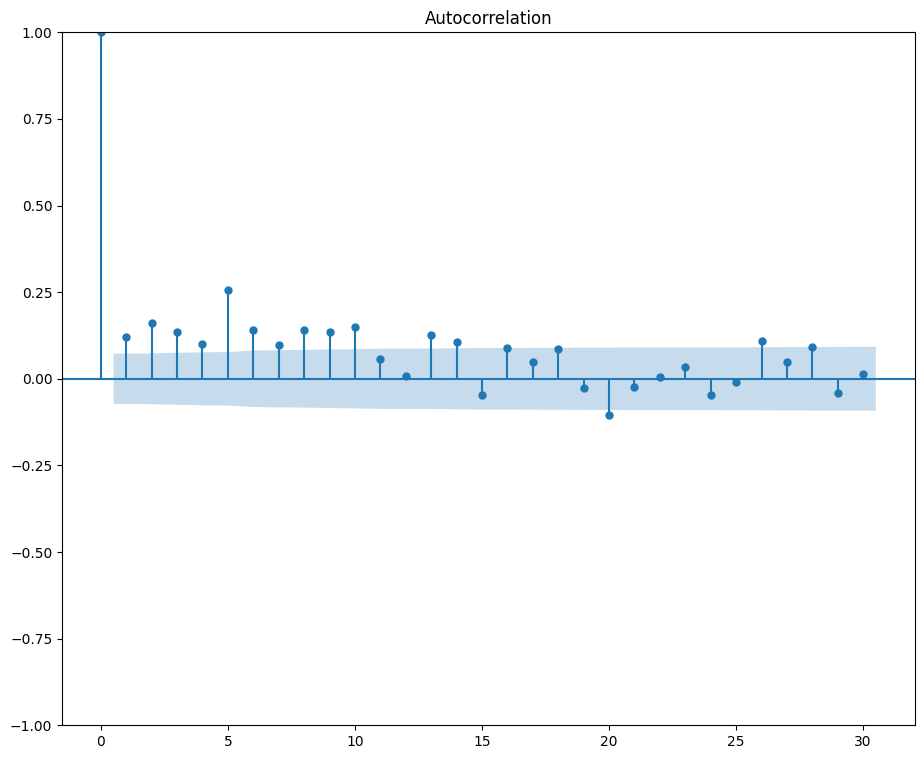

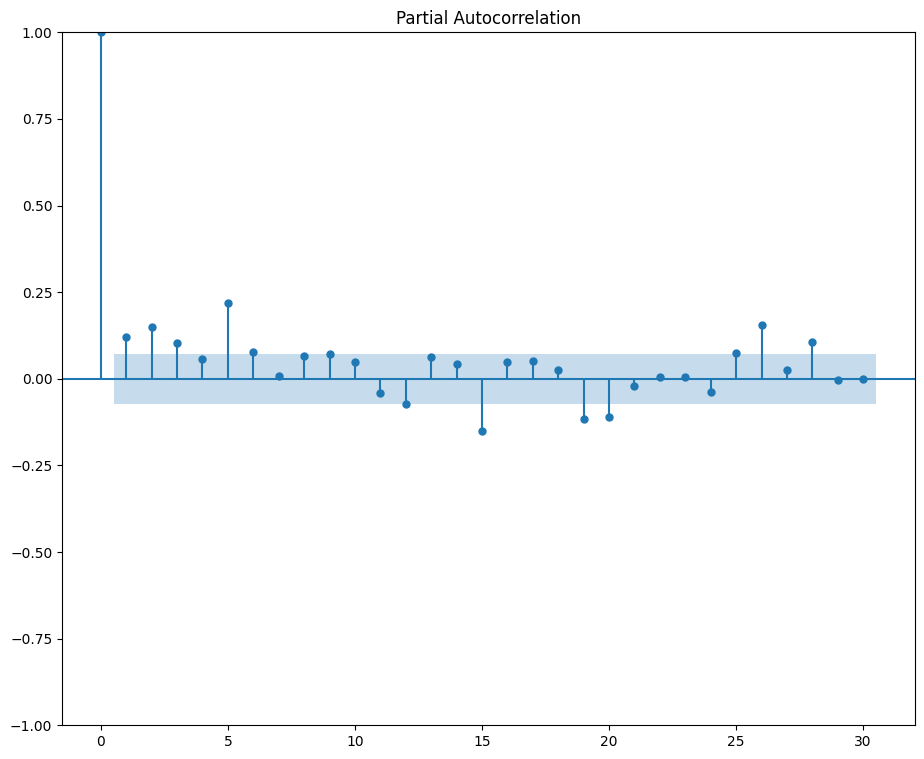

In [72]:
ts = passengers["Passengers"]


fig = plt.figure(figsize=(12, 7))
# рисуем автокорреляционную функцию
# 
# изображение отрисовывается с запаздываниями по горизонтали и корреляциями по
# вертикали
ac_plot = smt.graphics.plot_acf(ts, lags=30, alpha=0.5)

# есть также функция отрисовки частичной автокорреляции
pac_plot = smt.graphics.plot_pacf(ts, lags=30, alpha=0.5)

# Частичная автокорреляция (Partial Autocorrelation) — это краткая
# характеристика взаимосвязи между наблюдением во временном ряду и наблюдениями
# на предыдущем отрезке времени, когда влияние малой задержки устранено.
# Автокорреляция состоит как из прямой, так и из косвенной корреляции.

Можно все эти графики красиво отрисовать

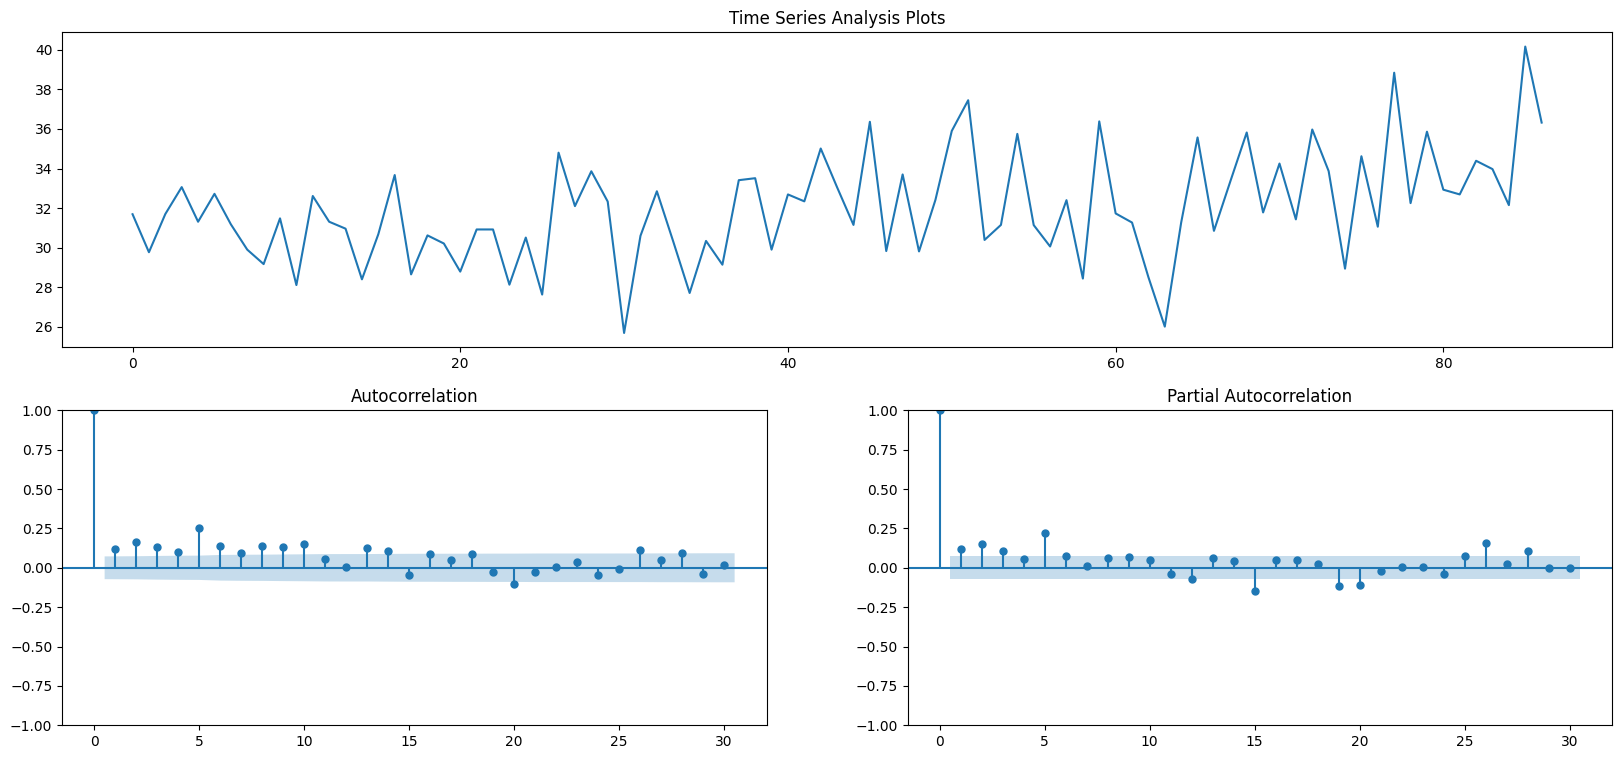

In [73]:
fig = plt.figure(figsize=(20, 9))
layout = (2, 2)
ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
acf_ax = plt.subplot2grid(layout, (1, 0))
pacf_ax = plt.subplot2grid(layout, (1, 1))

ts.plot(ax=ts_ax)
ts_ax.set_title('Time Series Analysis Plots')
smt.graphics.plot_acf(ts, lags=30, ax=acf_ax, alpha=0.5)
smt.graphics.plot_pacf(ts, lags=30, ax=pacf_ax, alpha=0.5)
None